In [1]:
#library
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
DATA2_PATH='D:/Magister Program/Master Computer Science/Semester 1/Machine Learning/PROJECT CLASS/TB_Chest_Radiography/TB_Chest_Radiography_Database/x-ray-images/'
DATA2_TRAIN_NORNAL=DATA2_PATH+"/Normal/"
DATA2_TRAIN_Tuberculosis=DATA2_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA2_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA2_TRAIN_NORNAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=1
dtuber["images"]=DATA2_TRAIN_Tuberculosis+dtuber["images"]


DF=pd.concat([dnorm,dtuber],ignore_index=True)
DF["mat_images"]=DF['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels,mat_images
0,D:/Magister Program/Master Computer Science/Se...,0,"[[141, 71, 24, 6, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1..."
1,D:/Magister Program/Master Computer Science/Se...,0,"[[233, 226, 221, 214, 211, 208, 202, 201, 199,..."
2,D:/Magister Program/Master Computer Science/Se...,0,"[[12, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8..."
3,D:/Magister Program/Master Computer Science/Se...,0,"[[27, 17, 10, 8, 8, 7, 7, 7, 7, 7, 7, 7, 8, 8,..."
4,D:/Magister Program/Master Computer Science/Se...,0,"[[40, 47, 47, 25, 21, 20, 20, 21, 20, 20, 19, ..."
...,...,...,...
4209,D:/Magister Program/Master Computer Science/Se...,0,"[[73, 19, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4210,D:/Magister Program/Master Computer Science/Se...,0,"[[19, 19, 19, 18, 18, 18, 18, 18, 18, 17, 18, ..."
4211,D:/Magister Program/Master Computer Science/Se...,0,"[[157, 146, 140, 133, 125, 122, 117, 114, 111,..."
4212,D:/Magister Program/Master Computer Science/Se...,1,"[[31, 33, 35, 35, 38, 39, 42, 44, 48, 50, 52, ..."


In [3]:
#F_DATA=pd.concat([DF2],ignore_index=True)
#F_DATA.sample(frac=1, random_state=42).reset_index(drop=True)
#F_DATA

In [4]:
X=DF["mat_images"]
Y=DF["labels"]

In [5]:
#normalize 
X=X/255

In [6]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,2)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3371,)
(3371, 2)
(843,)
(843, 2)


In [8]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [9]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3371, 224, 224)
(3371, 2)
(843, 224, 224)
(843, 2)


In [11]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer = l2(0.01)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(64, activation='relu', kernel_regularizer = l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)      

In [12]:
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=3, 
    verbose=1,
    mode = 'min',
    restore_best_weights=True
)

In [14]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_test,y_test),
                    batch_size=64,
                    callbacks=[early_stopping]
            )

Epoch 1/50


53/53 [==============================] - 39s 706ms/step - loss: 1.5201 - accuracy: 0.8084 - val_loss: 0.8785 - val_accuracy: 0.9265
Epoch 2/50
53/53 [==============================] - 39s 739ms/step - loss: 0.6869 - accuracy: 0.8852 - val_loss: 0.4986 - val_accuracy: 0.9276
Epoch 3/50
53/53 [==============================] - 40s 754ms/step - loss: 0.4620 - accuracy: 0.9193 - val_loss: 0.3756 - val_accuracy: 0.9359
Epoch 4/50
53/53 [==============================] - 42s 796ms/step - loss: 0.3855 - accuracy: 0.9208 - val_loss: 0.4305 - val_accuracy: 0.8826
Epoch 5/50
53/53 [==============================] - 48s 908ms/step - loss: 0.3039 - accuracy: 0.9413 - val_loss: 0.3104 - val_accuracy: 0.9371
Epoch 6/50
53/53 [==============================] - 43s 806ms/step - loss: 0.2806 - accuracy: 0.9591 - val_loss: 0.2173 - val_accuracy: 0.9739
Epoch 7/50
53/53 [==============================] - 40s 765ms/step - loss: 0.2034 - accuracy: 0.9736 - val_loss: 0.2004 - val_accuracy: 0.97

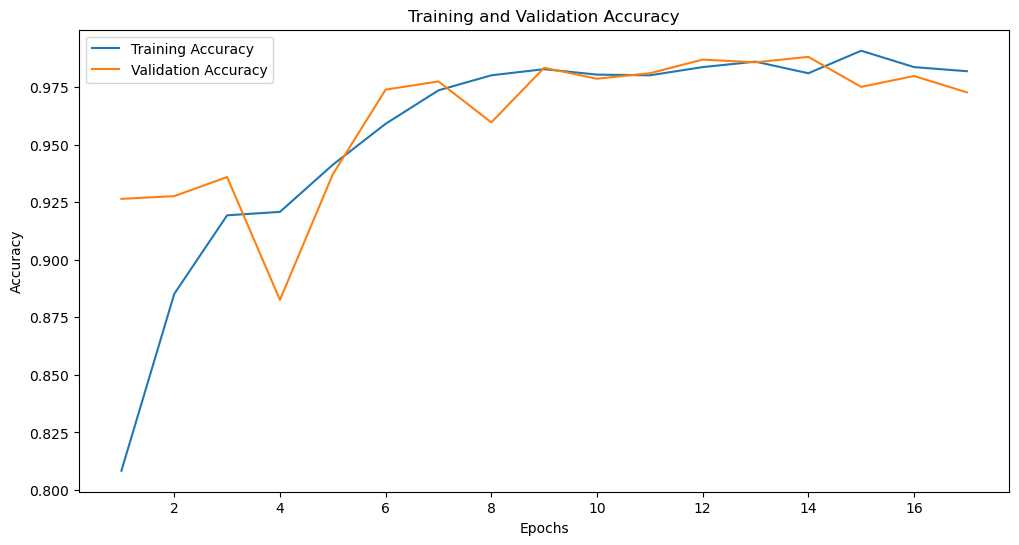

<Figure size 640x480 with 0 Axes>

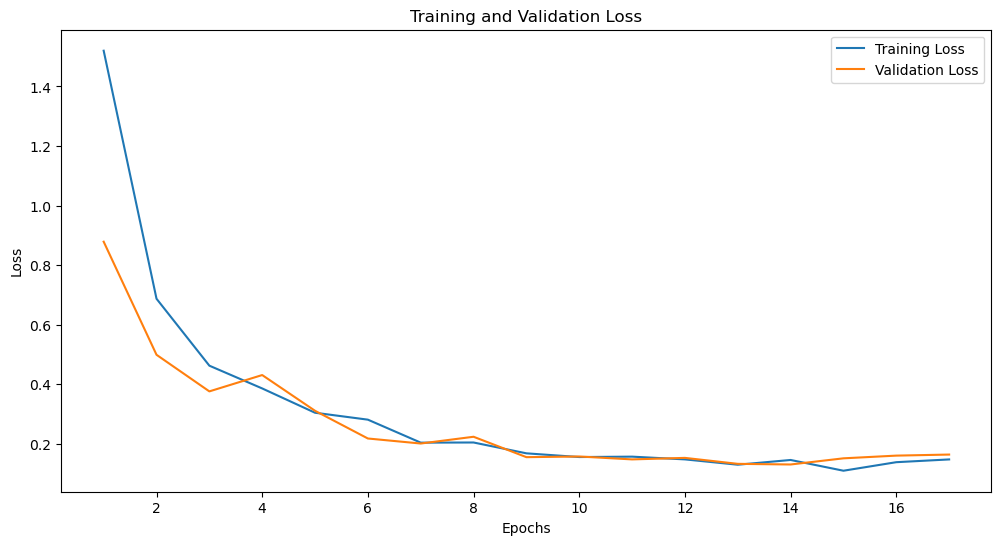

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Akurasi
plt.figure(figsize = (12, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot Loss
plt.figure(figsize = (12, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

27/27 [==============================] - 3s 104ms/step


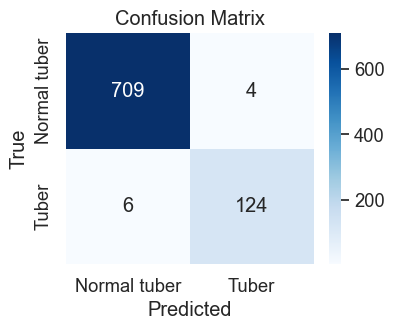

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['Normal tuber', 'Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_true,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       713
           1       0.97      0.95      0.96       130

    accuracy                           0.99       843
   macro avg       0.98      0.97      0.98       843
weighted avg       0.99      0.99      0.99       843



In [19]:
model.save('cnn_update_tuning.keras')

In [20]:
model.save('cnn_update_tuning.h5')

c:\Users\Hasnan Ramadhan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
